<a href="https://colab.research.google.com/github/vgarcialopezm/ABC-SMC/blob/main/sequential_monte_carlo_datos_articulo1000_kernel_uniforme_LV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import norm, uniform, multivariate_normal
from scipy.optimize import minimize
from scipy.special import logsumexp
import sys,ast
from random import choices,seed,random
from tqdm import tqdm
#import p_tqdm
from functools import partial
import os
import matplotlib.pyplot as plt


epsilons=[30.0,16.0,6.0,4.3,3.5,2.1,1.2,0.8,0.2,0.08]
#epsilons=[16.0,12.0,11.8,11.3,10.6,7.1,5.2]

parametros=[1,1,1,1]
print(type(parametros))

params_lotka_volterra = [ # list of parameters used in the lotka volterra model 
    {'name' : 'a', 'lower_limit':0.0,'upper_limit':10.0},# growing rate of prey in absence of repressor
    {'name' : 'b','lower_limit':0.0,'upper_limit':10.0},#susceptibility of prey 
    {'name' : 'c','lower_limit':0.0,'upper_limit':10.0},# extinction rate of predator
    {'name' : 'd','lower_limit':0.0,'upper_limit':10.0}# benefit of predator
]

<class 'list'>


In [2]:
def euc_dist(data1, data2):
    if np.shape(data1) != np.shape(data2):
        print ("\n the dimensions of the datasets are different (%s v.s. %s)\n" % (len(data1), len(data2)))
        sys.exit()
    else:
        distance = np.linalg.norm(data1 - data2)
        print('dist',data1 - data2)

    if distance < 0:
        return [None]
    else:
        return distance


In [3]:

def euc_disti(data1, data2):
    if np.shape(data1) != np.shape(data2):
        print ("\n the dimensions of the datasets are different (%s v.s. %s)\n" % (len(data1), len(data2)))
        sys.exit()
    else:
        z =np.array((data1[:,0] - data2[:,0])**2+ (data1[:,1] - data2[:,1])**2)
        #print (z)
        distance=np.sum(z)

    if distance < 0:
        return [None]
    elif np.isnan(distance):
      distance=100000
      return distance
    else:
        return distance



In [4]:
def prior():
### Generate a random parameter inside the limits stablished. The shape of the distribution can be changed if required
    prior = []
    for ipar,par in enumerate(params_lotka_volterra):
        prior.append(uniform.rvs(loc = par['lower_limit'],
                                 scale = par['upper_limit'])) #par['upper_limit']))
        
       
    return prior


In [5]:
#function that given the values of the parameters, calculates the 

def evaluate_prev_pru(params):
    print('parameters',params)
    l=len(params)
    prior = 1
    for ipar,par in enumerate(params_lotka_volterra):
    #for i in range(l):
        prior *= uniform.pdf(params[ipar],loc = par['lower_limit'],
                                 scale = par['upper_limit'])
        if prior==0:
            break   
      #  print('params i', params[i])
       # print('prior',prior)
    return prior


In [6]:
#function that, given a list of parameters sampled, perturbs it by applying a multivariate normal kernel
#function that, given a list of parameters sampled, perturbs it by applying a multivariate normal kernel
def perturbi(listaprev,s):
    #print(listaprev)
    lista=np.asarray(listaprev) #.tolist()
    #mean_vec=np.mean(lista)
    k=uniform.rvs(loc = -0.1,scale = 0.2)
    cov_matrix=2.0*np.cov(lista.T)  #the covariance matrix for the multivariate normal perturbation kernel is given by this expression
    kernel=multivariate_normal(cov=cov_matrix)
    pert=s+k # here we obtain the list of perturbed parameters
    pertur=pert.tolist()
    return pertur


In [7]:
def perturb(listaprev,s):
    #print(listaprev)
    lista=np.asarray(listaprev) #.tolist()
    #mean_vec=np.mean(lista)
    cov_matrix=2.0*np.cov(lista.T)  #the covariance matrix for the multivariate normal perturbation kernel is given by this expression
    kernel=multivariate_normal(cov=cov_matrix)
    pert=s+kernel.rvs() # here we obtain the list of perturbed parameters
    pertur=pert.tolist()
    return pertur


In [8]:

def rk4(f,in_c,t,params):
    #params=[a,b,c,d]
    #h=t[1]-t[0]
    n=len(t)
    X  = np.zeros([n,len(in_c)],dtype=np.float64)
    X[0]=in_c
    for i in range(n-1):
      h=t[i+1]-t[i]
      k1=f(t[i],X[i],*params)
      k2=f(t[i]+h/2.,X[i]+k1*h/2.,*params)
      k3=f(t[i]+h/2,X[i]+k2*h/2.,*params)
      k4=f(t[i]+h,X[i]+k3*h,*params)
    
      X[i+1]=X[i]+h*(k1/6.+k2/3.+k3/3.+k4/6.)
     
    return X

In [9]:
def lotka_volterra(t,X,a,b,c,d):
    x,y=X
    dx=a*x-b*x*y
    dy=c*x*y-d*y
    return np.array([dx,dy],dtype=np.float64)

X0=[1,0.5]
#t=np.linspace()
t=[1.1, 2.4, 3.9, 5.6, 7.5, 9.6, 11.9, 14.4]
t1=np.linspace(0,15,1000)

In [17]:
data1_c=np.array([[1.87, 0.65, 0.22, 0.31, 1.64, 1.15, 0.24, 2.91],[0.49, 2.62, 1.54, 0.02, 1.14, 1.68, 1.07, 0.88]]).T

def add_noise(mu,sigma,data):
    noise=np.random.normal(mu,sigma)
    data_noise=data+noise
    return data_noise
print('\n')
data1_noise=add_noise(0,0.5,midata)
print('data1 noise',data1_noise)




data1 noise [[0.93161405 0.43161405]
 [1.63197387 0.74838011]
 [0.95548979 1.47267567]
 [0.59738242 0.9850173 ]
 [0.86490445 0.61673464]
 [1.23606829 1.13950425]
 [0.93860301 0.89189583]
 [0.92442261 0.95066225]]


In [11]:
data1=rk4(lotka_volterra,X0,t1,parametros)
data1

array([[1.        , 0.5       ],
       [1.00753562, 0.50002825],
       [1.01512716, 0.5001133 ],
       ...,
       [1.64770903, 1.33001189],
       [1.63940556, 1.34292658],
       [1.63082821, 1.35579484]])

Text(0, 0.5, 'populations density')

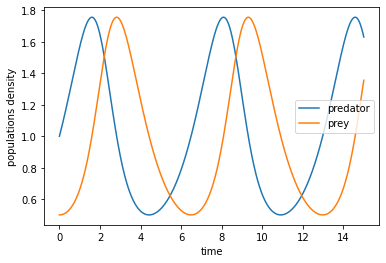

In [15]:
plt.figure()
plt.plot( t1, data1[:,0],label='predator')
plt.plot( t1, data1[:,1],label='prey')
plt.legend()
plt.xlabel('time')
plt.ylabel('populations density')
#plt.plot(t,data1_c[:,0],'o')
#plt.plot(t,data1_c[:,1],'*')
#plt.plot( t, data3,'x')

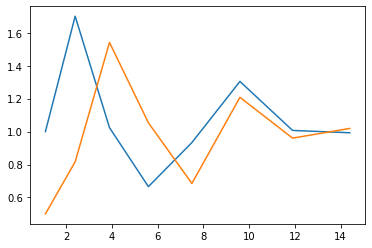

In [16]:
midata=rk4(lotka_volterra,X0,t,parametros)
midata
plt.figure()
plt.plot( t, midata)

In [18]:
euc_dist(midata,data1_noise)

dist [[0.06838595 0.06838595]
 [0.06838595 0.06838595]
 [0.06838595 0.06838595]
 [0.06838595 0.06838595]
 [0.06838595 0.06838595]
 [0.06838595 0.06838595]
 [0.06838595 0.06838595]
 [0.06838595 0.06838595]]


0.2735437860863028

In [19]:



#function that gives the denominator used to calculate the weights of every particle.
def weighting(i,j,N,sam,wei,sampre):
     denom=0
     #ker=1
     samprev=np.asarray(sampre)
     cov_matrix=2.0*np.cov(samprev.T)
     kernel=multivariate_normal(cov=cov_matrix)
     for k in range(N):
            #print('sample i j',type(sam[k]),sam[k])
           # print('sample i-1,j',type(sampre[k]),sampre[k])
            sampre[k]=np.array(sampre[k])
            #print('sampre',sampre[k])
            #cov_matrix=2.0*np.cov((sampre[k]).T)  #the covariance matrix for the multivariate normal perturbation kernel is given by this expression
            #print('cov',cov_matrix)
            #kernel=multivariate_normal(cov=cov_matrix)
            # print('wei',wei[i-1,k])
            #print('sam[j]',sam[j])
            #print('sampre[k]',sampre[k])
            ker=kernel.pdf(sam[j]-sampre[k])
            #print('ker',ker)
            #kerne=np.prod(ker)  #here we are obtaining the joint probability of the parameter vector obtained when applying the kernel
            denom+=wei[k]*ker #kerne
            #print('kernel',kernel.cdf(sam[k]-sampre[k]))
     #print('den',denom)      
     return denom


    


In [20]:
#function used to normalize the weights
def normalize(wei):
    #normalized=wei/np.linalg.norm(wei)
    normalized=wei/np.sum(wei)
    return normalized  



In [21]:
def principal(epsilons,listaparametros,N,data1,t):
   # accepted_distances = np.loadtxt('smc/distances_{}_{}_{}_{}.out'.format(model,sto,gamma,prior_label))
    T=len(epsilons)
    weight=np.zeros((T,N),float)
    dist=np.zeros((T,N),float)
    sample=np.zeros((T,N),list)
    X0=[1.0,0.5]
    #t=np.linspace(0.,10,10)
    for i in range(T):
        count=0
        counti=0
        label=i
        print("SMC step with target distance: {}".format(epsilons[i]))
        if i==0:
            for j in range (N):
                dist[i,j]=epsilons[i]+1
                while dist[i,j]>epsilons[i]:
                    sample[i,j]=prior()
                    #sample[i,j]=np.array(prior())
                    sample[i,j]=np.asarray(sample[i,j])
                    data2= rk4(lotka_volterra,X0,t,sample[i,j])
                    #print('data2',data2)
                    #data2=np.array(data2, dtype=np.float64)
                    dist[i,j]=euc_disti(data1,data2)
                    #print('distcondata2',dist[i,j])
                count+=1
                print(count)
       
        else:
        
            for j in range (N):
                dist[i,j]=epsilons[i]+1
                while dist[i,j]>epsilons[i]:
                    seed()
                    np.random.seed()
                    choose = choices(sample[i-1,:], weights = weight[i-1,:],k=1)[0] # select a point from the previous sample
                    sample[i,j]=choose
                    #print("before perturb",type(sample[i,j]))
                    #print("before perturb",list(sample[i-1,:]))
                    sample[i,j] = perturb(list(sample[i-1,:]),sample[i,j]) # and perturb it
                    #print("after perturb", sample[i,j])
                    #print("after perturb", type(sample[i,j]))
                    evaluation=evaluate_prev_pru(sample[i,j]) 
                    if evaluation>0:
                        data2=rk4(lotka_volterra,X0,t,sample[i,j])
                        data2=np.array(data2)
                        #print('data2',data2)
                        dist[i,j]=euc_disti(data1,data2)
                        print('distendata2',dist[i,j])
                counti+=1
                print(counti)
        for j in range(N):
            if i==0:
                weight[i,j]=1
               # print(weight[i,j])
            else:
                denom=weighting(i,j,N,sample[i,:],weight[i-1,:],list(sample[i-1,:]))
                weight[i,j]=evaluate_prev_pru(sample[i,j])/denom
        #print('weight[i,:]',weight[i,:])
        if i!=0:
           weight[i,:]=normalize(weight[i,:])
           #print('weight[i,:] normalized',weight[i,:])
        #pars = np.loadtxt('smc_van/pars_{}.out'.format(i))
        #weights = np.loadtxt('smc_van/weights_{}.out'.format(i))
        #np.savetxt('smc_van/pars_{}.out'.format(i), sample[T-1,:])
        #np.savetxt('smc_van/weights_{}.out'.format(i), weight[T-1,:])
      #  np.savetxt('smc/distances_{}.out'.format(label), accepted_distances)
    #print('sample',sample[T-1,N-1])
    #print('weight',weight[T-1])
    #print('dist',dist[T-1])
    return sample, weight, dist,data2


In [ ]:
sample,weight,dist,data2=principal(epsilons,params_lotka_volterra,100,midata,t)

SMC step with target distance: 30.0
1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys


2
3
4
5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in multiply
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in add
  import sys


6
7
8
9
10
11
12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


Se han truncado las últimas 5000 líneas del flujo de salida.
parameters [1.2221782637958953, 1.3257891345728952, 0.7574264139441684, 0.8831132101089081]
distendata2 0.41137899843045533
parameters [0.8330666679802512, 0.7459572501037948, 1.009143446794049, 1.0370298788651369]
distendata2 0.641582429117286
parameters [1.1623048723540286, 1.1711525006162145, 0.8689532024341265, 0.9034966161476035]
distendata2 0.03987950967967655
18
parameters [1.0127731629805412, 0.9569370097167682, 0.9966233793747012, 1.1069063300070598]
distendata2 0.16062541177114148
parameters [1.3708766006902526, 1.4589684763555473, 0.5550704973253999, 0.5612653187626196]
distendata2 1.1343724552622618
parameters [1.3640955892948061, 1.3556425202912579, 0.5045319196024338, 0.4707329307148841]
distendata2 4.244257491121163
parameters [0.3865121721641891, 0.3005428496734174, 1.6112239682270397, 1.610104934107088]
distendata2 5.1384961792661565
parameters [1.419574882132089, 1.3633545768804551, 0.6842877829050705, 0.731

In [ ]:

print("min accepted distance: ",np.min(dist[-1,:]))
print("median accepted distance: ",np.median(dist[-1,:]))
#print("median evaluated distance: ",np.median(evaluated_distances))


min accepted distance:  0.004602423672076042
median accepted distance:  0.05655811027854997


In [ ]:
np.median(sample[-1,:])

array([0.54223793, 0.6122077 , 0.38201695, 0.34401115, 0.54464085,
       0.70332891, 0.56982276, 0.58074605])

In [ ]:
parama=[]
for j in sample[-1,:]:
    parama.append(j[0])
    


In [ ]:
amean=np.mean(parama)
amed=np.median(parama)
print('mean',amean)
print('median',amed)

mean 0.8557603824890183
median 0.8668282637530619


In [ ]:
paramb=[]
for j in sample[-1,:]:
    paramb.append(j[1])
    


In [ ]:
bmean=np.mean(paramb)
bmed=np.median(paramb)
print('mean',bmean)
print('median',bmed)

mean 1.1780347500318402
median 1.1507386680558358


In [ ]:
np.shape(data1_noise)

(8, 2)

In [ ]:
np.shape(data2)

(8, 2)

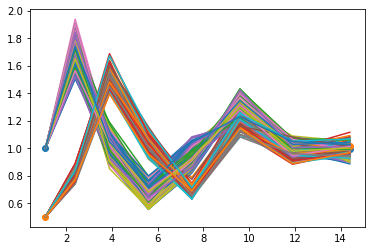

In [ ]:
plt.figure()
plt.plot(t,midata,'o')
for i in sample[-1,:]:
    data=rk4(lotka_volterra,X0,t,i)
    plt.plot(t,data)
plt.show()

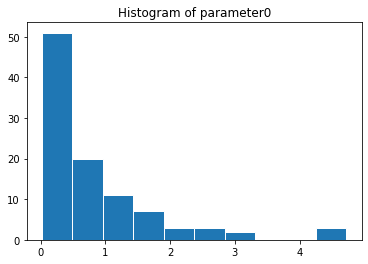

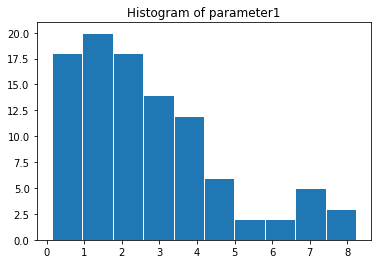

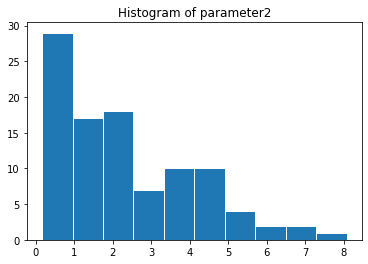

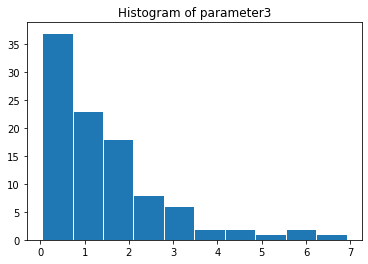

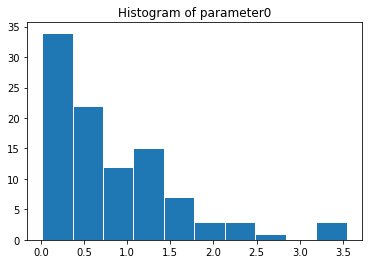

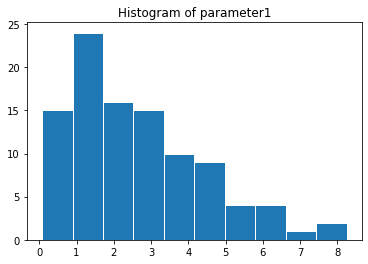

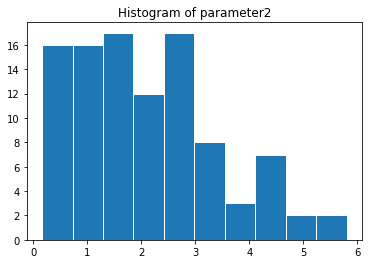

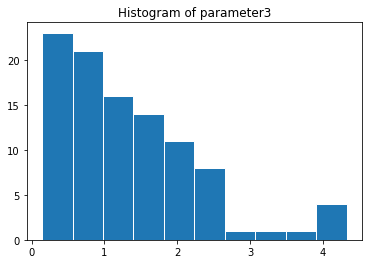

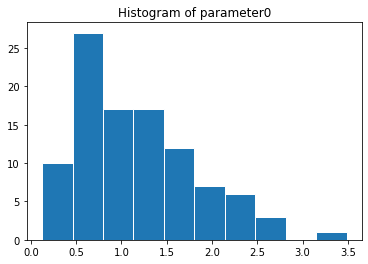

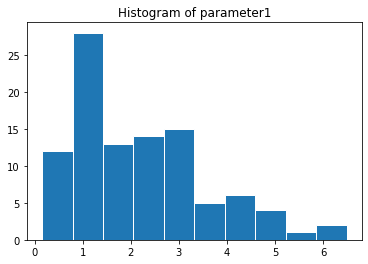

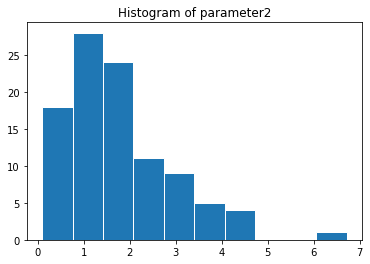

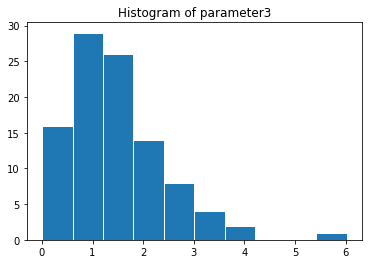

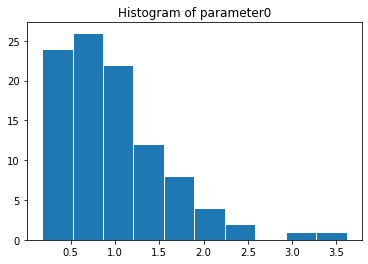

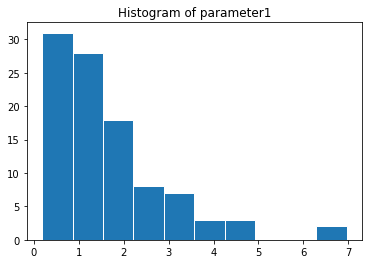

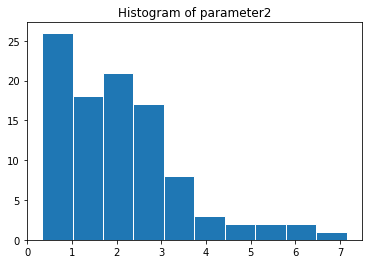

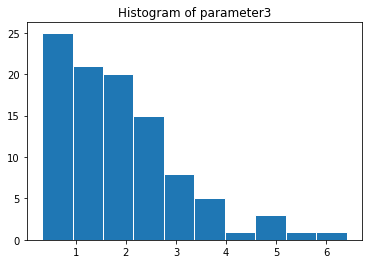

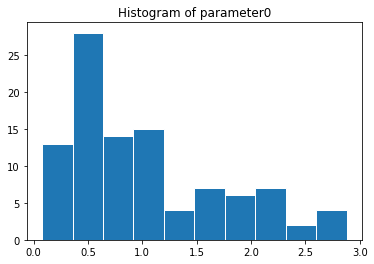

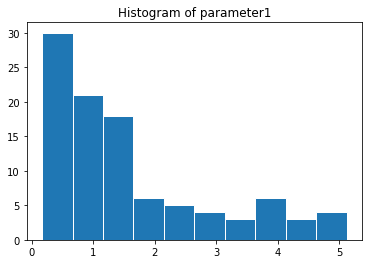

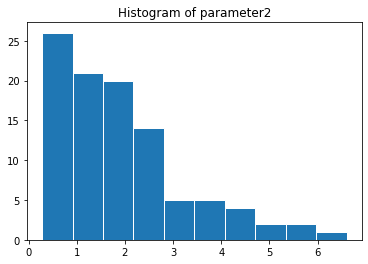

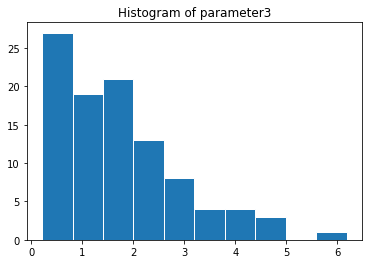

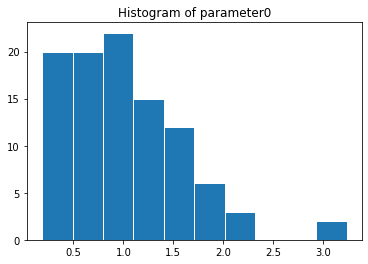

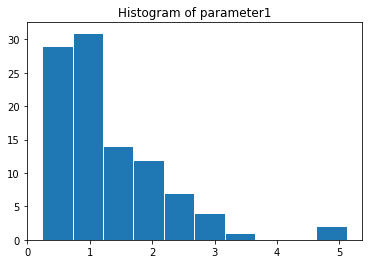

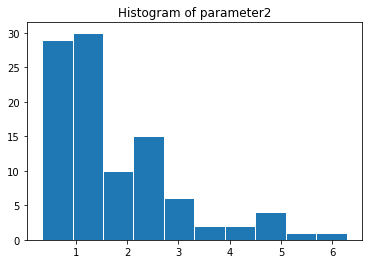

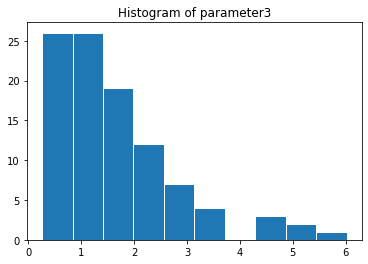

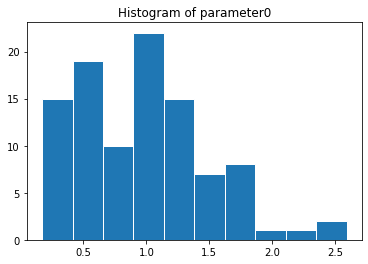

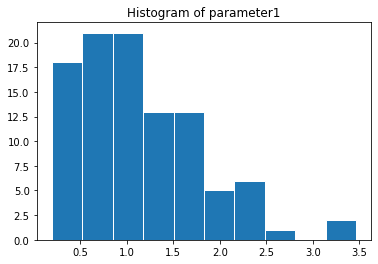

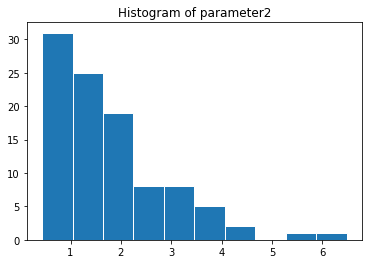

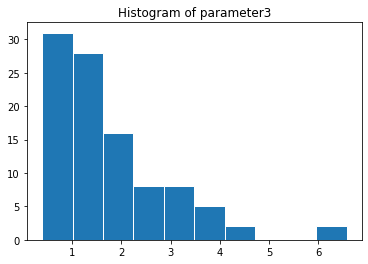

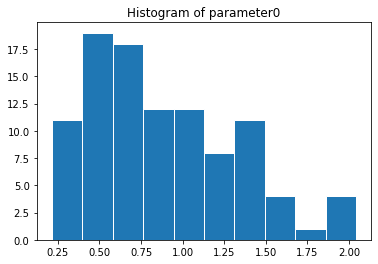

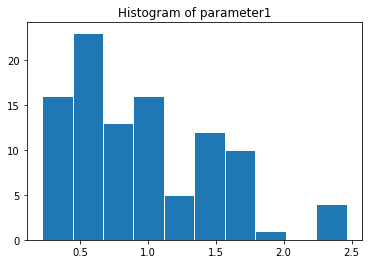

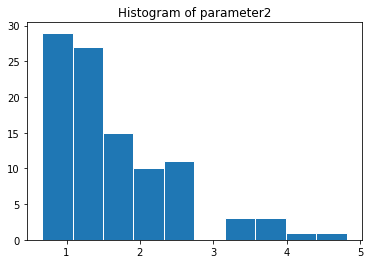

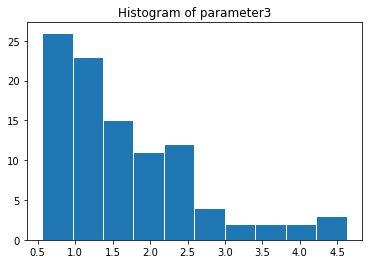

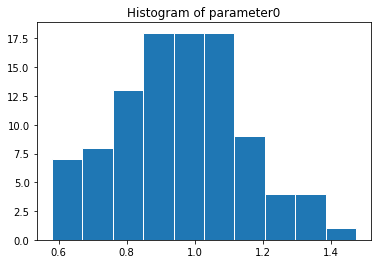

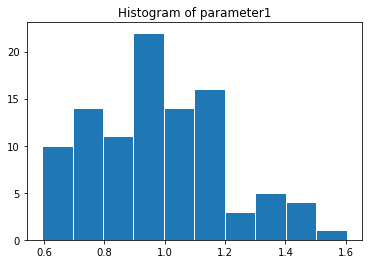

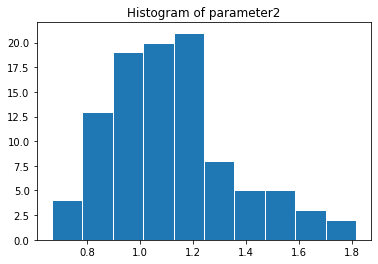

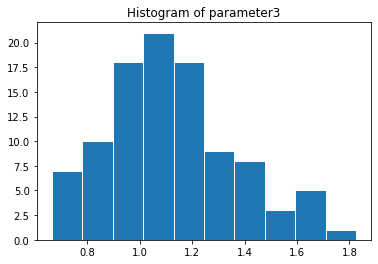

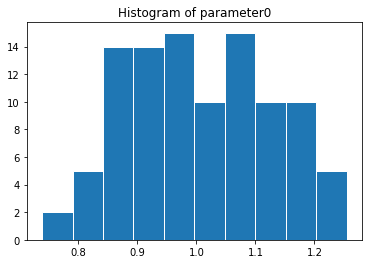

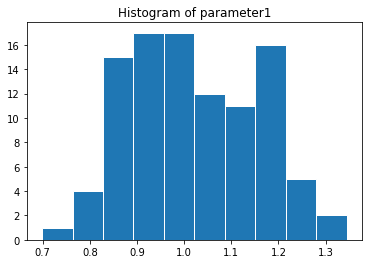

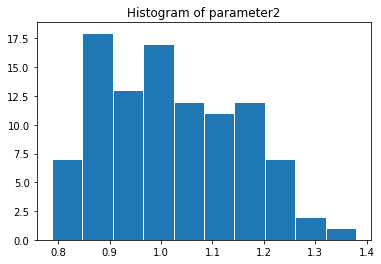

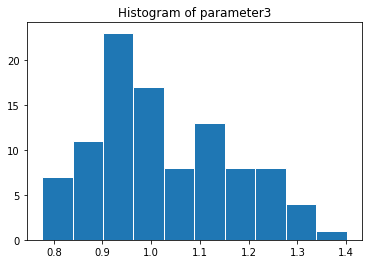

In [ ]:
for k in range(len(epsilons)):
    for j in range(len(params_lotka_volterra)):
        plt.figure()
        b=[]
        for i in sample[k,:]:
            b.append(i[j])
        al=np.histogram(b)
        n,bins,patches=plt.hist(b,edgecolor='white')
        plt.title('Histogram of parameter'+str(j))
    plt.show()
plt.show()


In [ ]:
print("min accepted distance: ",np.min(dist))

min accepted distance:  0.05172146957889984


In [ ]:
mindis=np.min(dist[-1,:])
np.where(dist==mindis)

(array([9]), array([2]))

In [ ]:
maxdis=np.max(dist[-1,:])
np.where(dist==maxdis)

(array([4]), array([184]))

In [ ]:
mindis

0.004602423672076042

In [ ]:
dist[-1,:]

array([0.06506246, 0.00653923, 0.00460242, 0.05767886, 0.0690099 ,
       0.03422393, 0.07104051, 0.02640341, 0.07420499, 0.05741131,
       0.0152987 , 0.07882168, 0.0633644 , 0.06915897, 0.07820306,
       0.02814603, 0.05262127, 0.03987951, 0.04222812, 0.06827035,
       0.07470061, 0.06324633, 0.07138844, 0.03082039, 0.05599311,
       0.02021681, 0.06205314, 0.05796536, 0.01911394, 0.07685126,
       0.03155421, 0.06404871, 0.06740468, 0.01359012, 0.05904158,
       0.04692862, 0.06333037, 0.0798314 , 0.06649863, 0.01142693,
       0.0758332 , 0.07546852, 0.053214  , 0.07827947, 0.04519493,
       0.02881421, 0.06120058, 0.01523884, 0.07903943, 0.04368962,
       0.04265667, 0.05453386, 0.06994784, 0.06534931, 0.04132987,
       0.04599716, 0.01210167, 0.06016081, 0.0700172 , 0.05987978,
       0.05666258, 0.06092131, 0.06092927, 0.01862159, 0.07703572,
       0.03846402, 0.01268523, 0.07452777, 0.02753412, 0.0798122 ,
       0.0687141 , 0.03475082, 0.05588582, 0.03933072, 0.02997

In [22]:
data4=rk4(lotka_volterra,X0,t,sample[-1,2])

NameError: ignored

ValueError: ignored

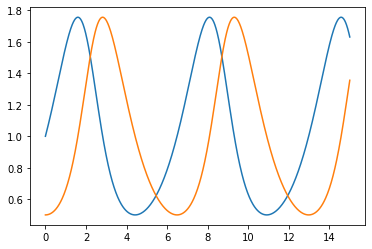

In [ ]:
plt.figure()
plt.plot()
plt.plot(t,midata,'o-')
plt.plot(t,data4,'*')
plt.show()